In [1]:
import numpy as np
import pandas as pd

#def generate_time_series(batch_size, n_steps):
    # Genera 4 matrices aleatorias de forma (batch_size, 1) utilizando np.random.rand()
 #   freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    
    # Crea una matriz de tiempo uniformemente distribuida entre 0 y 1 utilizando np.linspace()
  #  time = np.linspace(0, 1, n_steps)
    
    # Crea la primera onda sinusoidal multiplicando la matriz de tiempo por las frecuencias aleatorias y aplicando una fase aleatoria
   # series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    
    # Crea la segunda onda sinusoidal de manera similar a la primera
    #series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    
    # Agrega ruido aleatorio a la serie de tiempo
    #series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    
    # Agrega una dimensión adicional a la matriz para que tenga forma (batch_size, n_steps, 1)
    # y convierte el tipo de datos a float32
    #return series[..., np.newaxis].astype(np.float32)


In [2]:
#importamos nuestro Drive dandole acceso a nuestro goggle drive 
from google.colab import drive 
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
#nos aseguramos de que es lo que tenemos en nuestro DataSet
!ls '/gdrive/My Drive/dl-pytorch/datasets/forestfires'

forestfires.csv


In [4]:
path='/gdrive/My Drive/dl-pytorch/datasets/forestfires'

In [5]:
# Leer los datos del archivo CSV
data = pd.read_csv(path+"/forestfires.csv")
data.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


##generar una serie de tiempo 
utilizaremos una de las características numéricas que permitan crear una serie de tiempo. Por ejemplo, se podría crear una serie de tiempo utilizando la temperatura o la humedad relativa.
en este caso usaremos la temperatura 


In [6]:
def generate_time_series(batch_size, n_steps):
    # Seleccionar temperaturas aleatorias para cada serie de tiempo
    temp = np.random.choice(data['temp'], size=batch_size)
    wind = np.random.choice(data['wind'],size=batch_size)
    # Crear serie de tiempo con una onda sinusoial y ruido
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - temp.reshape(-1, 1)) * 10) 

    series *= 0.2 * np.sin((time - wind.reshape(-1, 1)) * 20) 

    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) 

    
    return series[..., np.newaxis].astype(np.float32)



##utilizamos la función generate_time_series() 
para generar una serie de tiempo de 30 pasos (o timestamps) con un conjunto de datos de entrenamiento, validación y prueba.

La función generate_time_series() genera una serie de tiempo con una onda sinusoial y ruido, que se especifica mediante los parámetros batch_size y n_steps. La serie de tiempo generada es un array de numpy de dimensión (batch_size, n_steps, 1).

Luego, se utiliza el array generado series para crear los conjuntos de datos de entrenamiento, validación y prueba. Los primeros 7000 arrays de la dimensión n_steps se utilizan como conjunto de datos de entrenamiento y se toma el último valor de la dimensión n_steps como la etiqueta y_train. Los siguientes 2000 arrays de la dimensión n_steps se utilizan como conjunto de datos de validación y se toma el último valor de la dimensión n_steps como la etiqueta y_valid. Los últimos 1000 arrays de la dimensión n_steps se utilizan como conjunto de datos de prueba y se toma el último valor de la dimensión n_steps como la etiqueta y_test.

Finalmente, se devuelve la forma de los conjuntos de datos de entrenamiento X_train y y_train, que es (7000, 50) y (7000,), respectivamente.

In [7]:
n_steps = 30
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
X_train.shape, y_train.shape

((7000, 30, 1), (7000, 1))

In [8]:
print (series)

[[[ 0.00191833]
  [ 0.03592442]
  [-0.02034735]
  ...
  [ 0.04144755]
  [ 0.04686312]
  [-0.01325563]]

 [[-0.01850727]
  [ 0.01074108]
  [ 0.01940376]
  ...
  [-0.01798179]
  [ 0.04409154]
  [-0.07709221]]

 [[-0.05251132]
  [-0.01830907]
  [-0.00934963]
  ...
  [ 0.0292981 ]
  [ 0.01961967]
  [ 0.04174538]]

 ...

 [[ 0.06314728]
  [ 0.0612684 ]
  [ 0.13028324]
  ...
  [-0.08394513]
  [-0.04908625]
  [-0.08254344]]

 [[-0.13055989]
  [-0.1033264 ]
  [ 0.00582599]
  ...
  [ 0.09101953]
  [ 0.06201183]
  [ 0.02514254]]

 [[ 0.08539718]
  [ 0.07814556]
  [-0.02014974]
  ...
  [-0.07135867]
  [-0.0159226 ]
  [ 0.00356098]]]


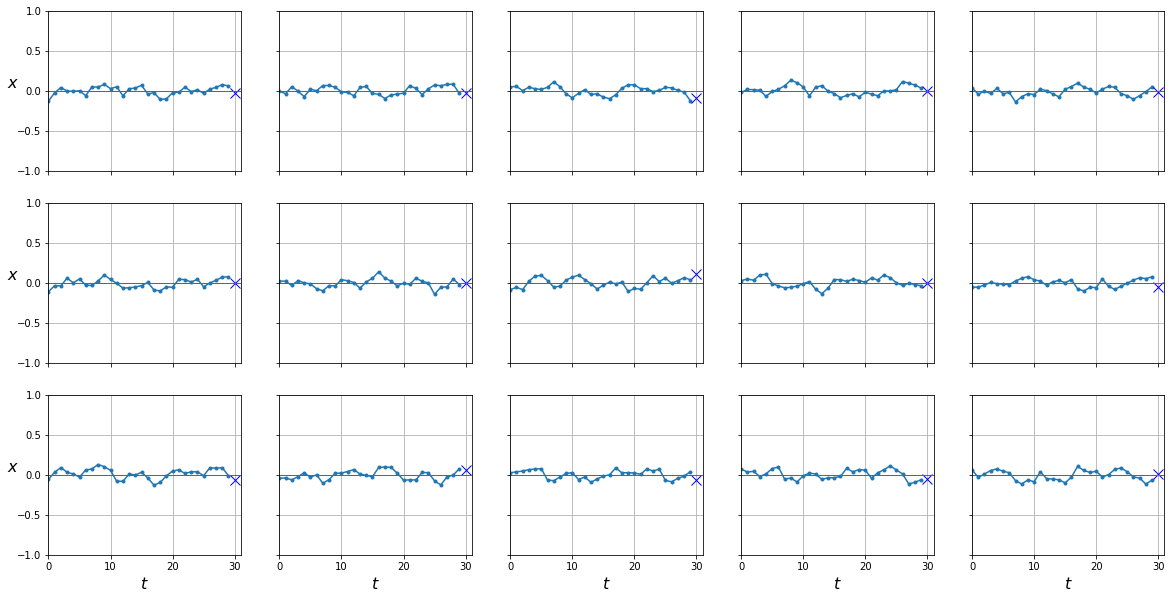

In [9]:
import matplotlib.pyplot as plt 

def plot_series(series, y=None, y_pred=None, y_pred_std=None, x_label="$t$", y_label="$x$"):
  r, c = 3, 5
  fig, axes = plt.subplots(nrows=r, ncols=c, sharey=True, sharex=True, figsize=(20, 10))
  for row in range(r):
    for col in range(c):
        plt.sca(axes[row][col])
        ix = col + row*c
        plt.plot(series[ix, :], ".-")
        if y is not None:
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y[ix])), y[ix], "bx", markersize=10)
        if y_pred is not None:
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y_pred[ix])), y_pred[ix], "ro")
        if y_pred_std is not None:
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y_pred[ix])), y_pred[ix] + y_pred_std[ix])
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y_pred[ix])), y_pred[ix] - y_pred_std[ix])
        plt.grid(True)
        plt.hlines(0, 0, 100, linewidth=1)
        plt.axis([0, len(series[ix, :])+len(y[ix]), -1, 1])
        if x_label and row == r - 1:
          plt.xlabel(x_label, fontsize=16)
        if y_label and col == 0:
          plt.ylabel(y_label, fontsize=16, rotation=0)
  plt.show()

plot_series(X_test, y_test)

In [10]:
from sklearn.metrics import mean_squared_error

y_pred = X_test[:,-1]
mean_squared_error(y_test, y_pred)

0.0029021925

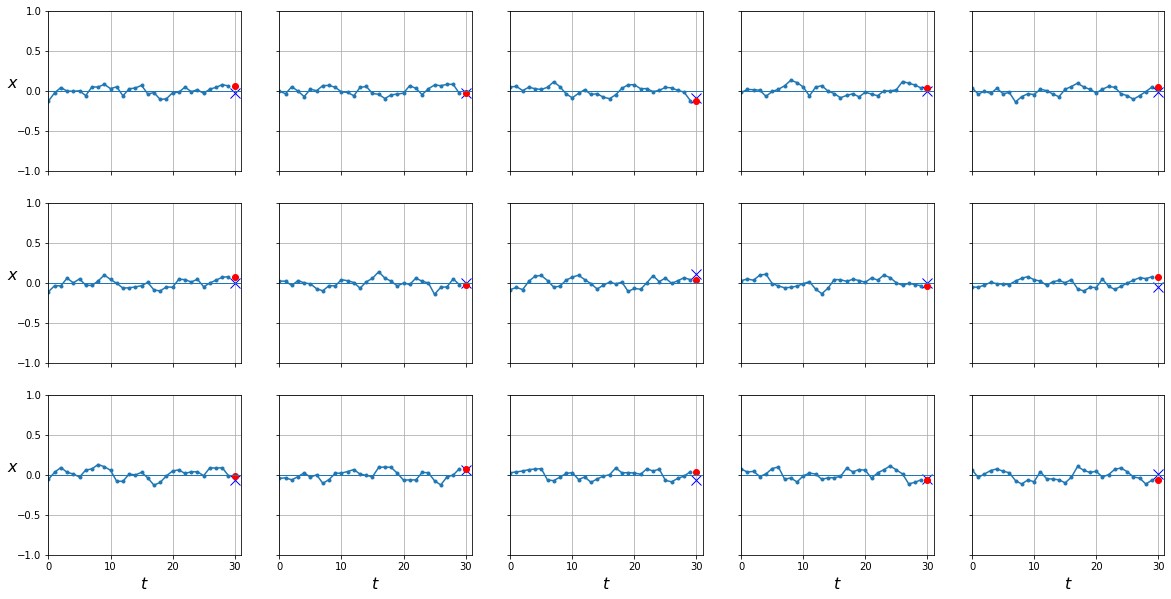

In [11]:
y_pred = X_test[:,-1]
plot_series(X_test, y_test, y_pred)

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader

class TimeSeriesDataset(Dataset):
  def __init__(self, X, y=None, train=True):
    self.X = X
    self.y = y
    self.train = train

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    if self.train:
      return torch.from_numpy(self.X[ix]), torch.from_numpy(self.y[ix])
    return torch.from_numpy(self.X[ix])

dataset = {
    'train': TimeSeriesDataset(X_train, y_train),
    'eval': TimeSeriesDataset(X_valid, y_valid),
    'test': TimeSeriesDataset(X_test, y_test, train=False)
}

dataloader = {
    'train': DataLoader(dataset['train'], shuffle=True, batch_size=64),
    'eval': DataLoader(dataset['eval'], shuffle=False, batch_size=64),
    'test': DataLoader(dataset['test'], shuffle=False, batch_size=64)
}

In [13]:
class MLP(torch.nn.Module):
  def __init__(self, n_in=30, n_out=1):
    super().__init__()
    self.fc = torch.nn.Linear(n_in, n_out)

  def forward(self, x):
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    return x

mlp = MLP()
mlp

MLP(
  (fc): Linear(in_features=30, out_features=1, bias=True)
)

In [14]:
from tqdm import tqdm
device = "cuda" if torch.cuda.is_available() else "cpu"

def fit(model, dataloader, epochs=10):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.MSELoss()
    bar = tqdm(range(1, epochs+1))
    for epoch in bar:
        model.train()
        train_loss = []
        for batch in dataloader['train']:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        model.eval()
        eval_loss = []
        with torch.no_grad():
            for batch in dataloader['eval']:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                eval_loss.append(loss.item())
        bar.set_description(f"loss {np.mean(train_loss):.5f} val_loss {np.mean(eval_loss):.5f}")
        
def predict(model, dataloader):
    model.eval()
    with torch.no_grad():
        preds = torch.tensor([]).to(device)
        for batch in dataloader:
            X = batch
            X = X.to(device)
            pred = model(X)
            preds = torch.cat([preds, pred])
        return preds

In [15]:
fit(mlp, dataloader)

loss 0.00093 val_loss 0.00093: 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


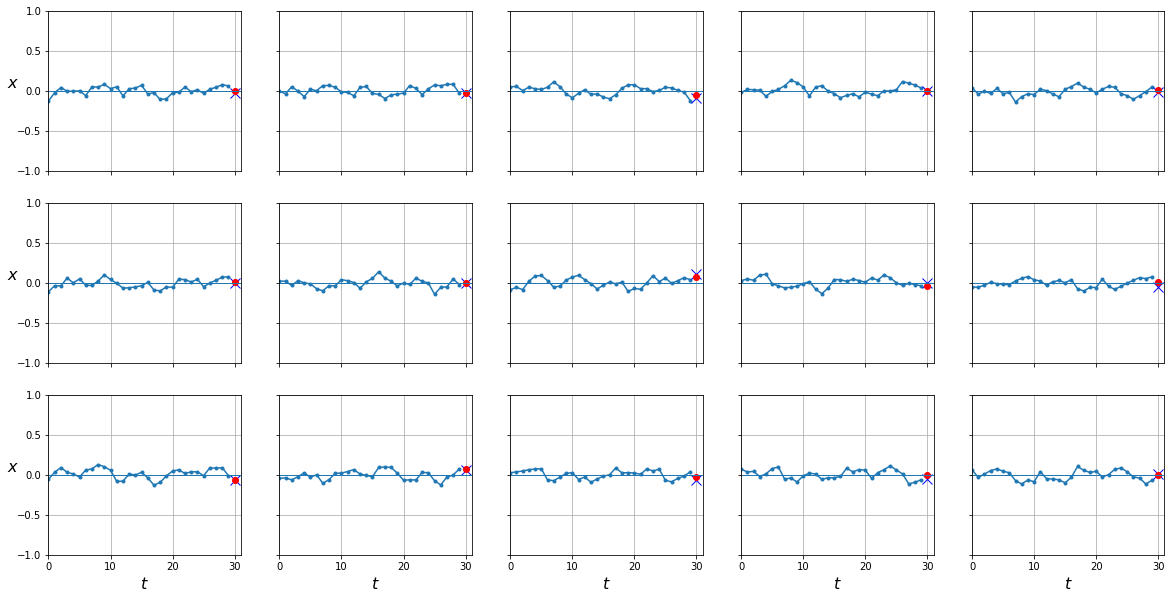

0.0009876214

In [16]:
y_pred = predict(mlp, dataloader['test'])
plot_series(X_test, y_test, y_pred.cpu().numpy())
mean_squared_error(y_test, y_pred.cpu())

## Red Recurrente Simple

In [17]:
class SimpleRNN(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.rnn = torch.nn.RNN(input_size=1, hidden_size=1, num_layers=1, batch_first=True)

  def forward(self, x):
    x, h = self.rnn(x) 
    # solo queremos la última salida
    return x[:,-1]

rnn = SimpleRNN()

In [19]:
fit(rnn, dataloader)

loss 0.00294 val_loss 0.00306: 100%|██████████| 10/10 [00:03<00:00,  3.20it/s]


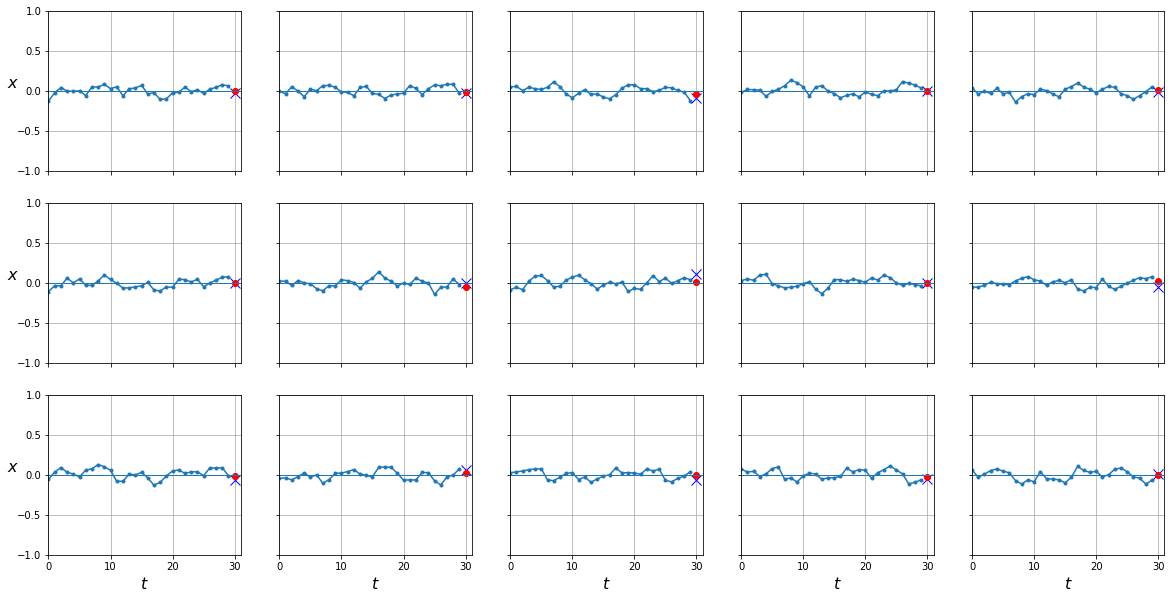

0.0027288592

In [20]:
y_pred = predict(rnn, dataloader['test'])
plot_series(X_test, y_test, y_pred.cpu().numpy())
mean_squared_error(y_test, y_pred.cpu())

In [21]:
# parámetros en el MLP

mlp.fc.weight.shape, mlp.fc.bias.shape

(torch.Size([1, 30]), torch.Size([1]))

In [22]:
# parámetros en la RNN simple

rnn.rnn.weight_hh_l0.shape, rnn.rnn.weight_ih_l0.shape, rnn.rnn.bias_hh_l0.shape, rnn.rnn.bias_ih_l0.shape

(torch.Size([1, 1]), torch.Size([1, 1]), torch.Size([1]), torch.Size([1]))

In [23]:
class RNN(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.rnn = torch.nn.RNN(input_size=1, hidden_size=40, num_layers=1, batch_first=True)
    self.fc = torch.nn.Linear(40, 1)

  def forward(self, x):
    x, h = self.rnn(x) 
    # get the last output and apply linear layer
    y = self.fc(x[:,-1])
    return y

rnn = RNN()

In [24]:
# parámetros en la nueva RNN 

rnn.rnn.weight_hh_l0.shape, rnn.rnn.weight_ih_l0.shape, rnn.rnn.bias_hh_l0.shape, rnn.rnn.bias_ih_l0.shape, rnn.fc.weight.shape, rnn.fc.bias.shape

(torch.Size([40, 40]),
 torch.Size([40, 1]),
 torch.Size([40]),
 torch.Size([40]),
 torch.Size([1, 40]),
 torch.Size([1]))

In [25]:
fit(rnn, dataloader)

loss 0.00100 val_loss 0.00096: 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]


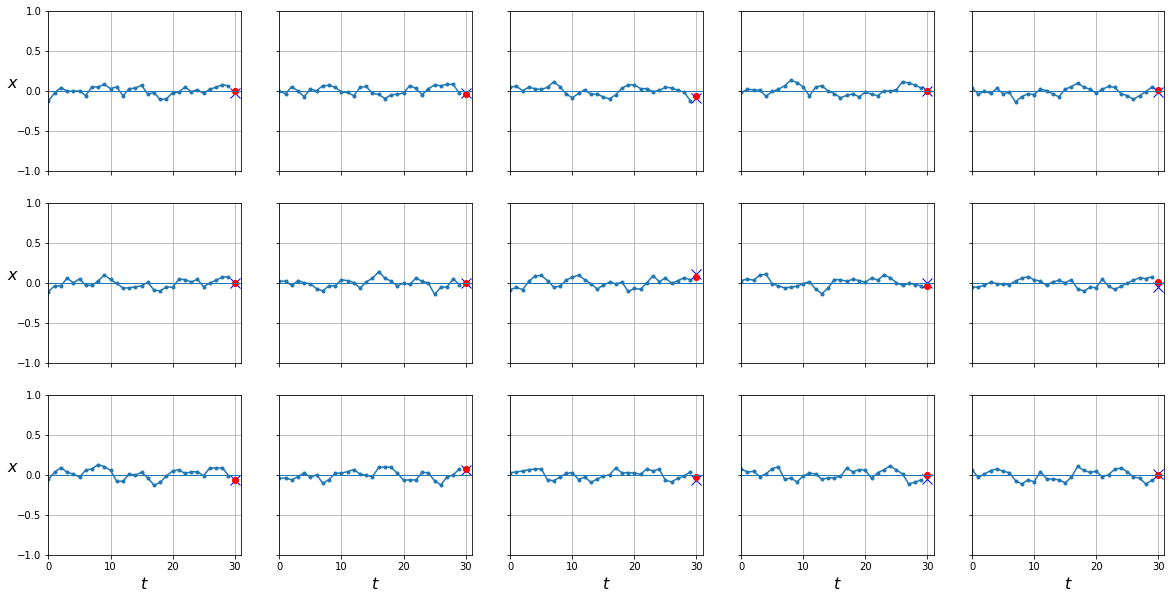

0.0010235487

In [26]:
y_pred = predict(rnn, dataloader['test'])
plot_series(X_test, y_test, y_pred.cpu().numpy())
mean_squared_error(y_test, y_pred.cpu())